In [1]:
library(tidyr)
library(brms)
library(dplyr)
library(lme4)
library(MASS)
library(kableExtra)
library(tidyverse)
library(broom)

Warning message:
"程辑包'tidyr'是用R版本4.2.3 来建造的"
Warning message:
"程辑包'brms'是用R版本4.2.3 来建造的"
载入需要的程辑包：Rcpp

Warning message:
"程辑包'Rcpp'是用R版本4.2.3 来建造的"
Loading 'brms' package (version 2.21.0). Useful instructions
can be found by typing help('brms'). A more detailed introduction
to the package is available through vignette('brms_overview').


载入程辑包：'brms'


The following object is masked from 'package:stats':

    ar


Warning message:
"程辑包'dplyr'是用R版本4.2.3 来建造的"

载入程辑包：'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Warning message:
"程辑包'lme4'是用R版本4.2.3 来建造的"
载入需要的程辑包：Matrix


载入程辑包：'Matrix'


The following objects are masked from 'package:tidyr':

    expand, pack, unpack



载入程辑包：'lme4'


The following object is masked from 'package:brms':

    ngrps



载入程辑包：'MASS'


The following object is masked from 'package:dplyr':

    select


Warning message:
"程辑包'k

In [2]:
data <- read.csv("data_ml/SharedResponses_combined_two_genders.csv")

In [3]:
data <- distinct(data)
data <- data %>% drop_na()
drops <- c("ResponseID", "ExtendedSessionID", "UserID", "Review_political")
data <- data[ , !(names(data) %in% drops)]
data$Saved <- factor(data$Saved)
data$Review_political_cat <- factor(data$Review_political_cat)

In [4]:
get_prior(Saved ~ 1 + . + (1 | Review_political_cat), data = data, family = bernoulli())

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,,default
,b,AttributeLevelFemale,,,,,,,default
,b,AttributeLevelFit,,,,,,,default
,b,AttributeLevelHigh,,,,,,,default
,b,AttributeLevelHoomans,,,,,,,default
,b,AttributeLevelLess,,,,,,,default
,b,AttributeLevelLow,,,,,,,default
,b,AttributeLevelMale,,,,,,,default
,b,AttributeLevelMore,,,,,,,default


In [29]:
# priors <- c(
#   prior(normal(0, 1), class = "Intercept"), # Prior for the global intercept
#   prior(student_t(1, 0, 2.5), class = "sd") # Prior for standard deviations of random effects
# )

priors <- c(
  prior(student_t(3, 0, 2.5), class = "Intercept"), # Updated prior for the global intercept
  prior(student_t(3, 0, 2.5), class = "sd") # Updated prior for standard deviations of random effects
)

# Define the model
model_hierarchical <- brm(
  formula = Saved ~ 1 + . + (1 | Review_political_cat),  # Model formula
  data = data,
  family = bernoulli("logit"), # Assuming 'Saved' is binary; using logistic regression
  prior = priors,
  save_pars = save_pars(all = TRUE),
  chains = 4,
  iter = 2000,
  seed = 123
)

# Summary of the model
summary(model_hierarchical)

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.001486 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 14.86 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 497.467 seconds (Warm-up)
Chain 1:                493.457 seconds (Sampling)
Chain 1:              

Warning message:
"There were 4000 transitions after warmup that exceeded the maximum treedepth. Increase max_treedepth above 10. See
https://mc-stan.org/misc/warnings.html#maximum-treedepth-exceeded"
Warning message:
"Examine the pairs() plot to diagnose sampling problems
"
Warning message:
"The largest R-hat is 3.77, indicating chains have not mixed.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#r-hat"
Warning message:
"Bulk Effective Samples Size (ESS) is too low, indicating posterior means and medians may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#bulk-ess"
Warning message:
"Tail Effective Samples Size (ESS) is too low, indicating posterior variances and tail quantiles may be unreliable.
Running the chains for more iterations may help. See
https://mc-stan.org/misc/warnings.html#tail-ess"
Warning message:
"Parts of the model have not converged (some Rhats are > 1.05). Be care

 Family: bernoulli 
  Links: mu = logit 
Formula: Saved ~ 1 + (ScenarioOrder + Intervention + PedPed + Barrier + CrossingSignal + AttributeLevel + ScenarioTypeStrict + ScenarioType + DefaultChoice + NonDefaultChoice + DefaultChoiceIsOmission + NumberOfCharacters + DiffNumberOFCharacters + Template + DescriptionShown + LeftHand + UserCountry3 + Man + Woman + Pregnant + Stroller + OldMan + OldWoman + Boy + Girl + Homeless + LargeWoman + LargeMan + Criminal + MaleExecutive + FemaleExecutive + FemaleAthlete + MaleAthlete + FemaleDoctor + MaleDoctor + Dog + Cat + Review_gender + Review_political_cat) + (1 | Review_political_cat) 
   Data: data (Number of observations: 2094) 
  Draws: 4 chains, each with iter = 2000; warmup = 1000; thin = 1;
         total post-warmup draws = 4000

Multilevel Hyperparameters:
~Review_political_cat (Number of levels: 5) 
              Estimate Est.Error l-95% CI u-95% CI Rhat Bulk_ESS Tail_ESS
sd(Intercept)     1.19      1.11     0.09     3.69 2.15        5  

In [33]:
get_prior(Saved ~ 1 + ., data = data, family = bernoulli())

prior,class,coef,group,resp,dpar,nlpar,lb,ub,source
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
,b,,,,,,,,default
,b,AttributeLevelFemale,,,,,,,default
,b,AttributeLevelFit,,,,,,,default
,b,AttributeLevelHigh,,,,,,,default
,b,AttributeLevelHoomans,,,,,,,default
,b,AttributeLevelLess,,,,,,,default
,b,AttributeLevelLow,,,,,,,default
,b,AttributeLevelMale,,,,,,,default
,b,AttributeLevelMore,,,,,,,default


In [37]:
priors <- c(
  prior(student_t(3, 0, 2.5), class = "Intercept"), # Updated prior for the global intercept
  prior(normal(0, 2.5), class = "sd") # Updated prior for standard deviations of random effects
)


In [42]:
model_non_hierarchical_with <- brm(
  formula = Saved ~ 1 + . ,  # Intercept and Review_political_cat as fixed effect
  data = data,
  family = bernoulli("logit"),
  save_pars = save_pars(all = TRUE),
  prior = c(
    prior(normal(0, 2.5), class = "Intercept"),
    prior(normal(0, 2.5), class = "b")  # Assuming a normal prior for fixed effects
  ),
  chains = 4,
  iter = 2000,
  seed = 123
)

Compiling Stan program...

Start sampling




SAMPLING FOR MODEL 'anon_model' NOW (CHAIN 1).
Chain 1: 
Chain 1: Gradient evaluation took 0.000229 seconds
Chain 1: 1000 transitions using 10 leapfrog steps per transition would take 2.29 seconds.
Chain 1: Adjust your expectations accordingly!
Chain 1: 
Chain 1: 
Chain 1: Iteration:    1 / 2000 [  0%]  (Warmup)
Chain 1: Iteration:  200 / 2000 [ 10%]  (Warmup)
Chain 1: Iteration:  400 / 2000 [ 20%]  (Warmup)
Chain 1: Iteration:  600 / 2000 [ 30%]  (Warmup)
Chain 1: Iteration:  800 / 2000 [ 40%]  (Warmup)
Chain 1: Iteration: 1000 / 2000 [ 50%]  (Warmup)
Chain 1: Iteration: 1001 / 2000 [ 50%]  (Sampling)
Chain 1: Iteration: 1200 / 2000 [ 60%]  (Sampling)
Chain 1: Iteration: 1400 / 2000 [ 70%]  (Sampling)
Chain 1: Iteration: 1600 / 2000 [ 80%]  (Sampling)
Chain 1: Iteration: 1800 / 2000 [ 90%]  (Sampling)
Chain 1: Iteration: 2000 / 2000 [100%]  (Sampling)
Chain 1: 
Chain 1:  Elapsed Time: 59.205 seconds (Warm-up)
Chain 1:                70.025 seconds (Sampling)
Chain 1:                1

In [43]:
library(loo)

# Hierarchical model
loo_hierarchical <- loo(model_hierarchical)

# Non-hierarchical models
loo_non_hierarchical_with <- loo(model_non_hierarchical_with)

# Compare models
loo_compare(loo_non_hierarchical_with, loo_hierarchical)

Warning message:
"Found 51 observations with a pareto_k > 0.7 in model 'model_hierarchical'. We recommend to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. "
Warning message:
"Found 4 observations with a pareto_k > 0.7 in model 'model_non_hierarchical_with'. We recommend to set 'moment_match = TRUE' in order to perform moment matching for problematic observations. "


,elpd_diff,se_diff,elpd_loo,se_elpd_loo,p_loo,se_p_loo,looic,se_looic
model_hierarchical,0.000000,0.000000,-1245.186,25.68224,119.0255,6.342685,2490.372,51.36449
model_non_hierarchical_with,-4.888894,5.605704,-1250.075,24.82691,117.4479,5.054129,2500.150,49.65383


In [45]:
waic_model_h <- waic(model_hierarchical)
waic_model_nh <- waic(model_non_hierarchical_with)

# Compare WAIC values
loo_compare(waic_model_h, waic_model_nh)

Warning message:
"
35 (1.7%) p_waic estimates greater than 0.4. We recommend trying loo instead."
Warning message:
"
30 (1.4%) p_waic estimates greater than 0.4. We recommend trying loo instead."


,elpd_diff,se_diff,elpd_waic,se_elpd_waic,p_waic,se_p_waic,waic,se_waic
model_hierarchical,0.000000,0.000000,-1241.432,25.61544,115.2709,5.959605,2482.863,51.23087
model_non_hierarchical_with,-4.745797,5.506098,-1246.177,24.75344,113.5502,4.727609,2492.355,49.50687


In [44]:
bridge_sampler_h <- bridge_sampler(model_hierarchical)
bridge_sampler_nh <- bridge_sampler(model_non_hierarchical_with)

# Calculate and compare Bayes Factors
bf <- bayes_factor(bridge_sampler_h, bridge_sampler_nh)
print(bf)

# Inverse Bayes Factor for the opposite comparison
bf_inverse <- bayes_factor(bridge_sampler_nh, bridge_sampler_h)
print(bf_inverse)

Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Iteration: 9
Iteration: 10
Iteration: 11
Iteration: 12
Iteration: 13
Iteration: 14
Iteration: 15
Iteration: 16
Iteration: 17
Iteration: 18
Iteration: 19
Iteration: 20
Iteration: 21
Iteration: 22
Iteration: 23
Iteration: 24
Iteration: 25
Iteration: 26
Iteration: 27
Iteration: 28
Iteration: 29
Iteration: 30
Iteration: 31
Iteration: 32
Iteration: 33
Iteration: 34
Iteration: 35
Iteration: 36
Iteration: 37
Iteration: 38
Iteration: 39
Iteration: 40
Iteration: 41
Iteration: 42
Iteration: 43
Iteration: 44
Iteration: 45
Iteration: 46
Iteration: 47
Iteration: 48
Iteration: 49
Iteration: 50
Iteration: 51
Iteration: 52
Iteration: 53
Iteration: 54
Iteration: 55
Iteration: 56
Iteration: 57
Iteration: 58
Iteration: 59
Iteration: 60
Iteration: 61
Iteration: 62
Iteration: 63
Iteration: 64
Iteration: 65
Iteration: 66
Iteration: 67
Iteration: 68
Iteration: 69
Iteration: 70
Iteration: 71
Iteration: 72
I

Warning message:
"logml could not be estimated within maxiter, rerunning with adjusted starting value. 
Estimate might be more variable than usual."


Iteration: 1
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 6
Iteration: 7
Iteration: 8
Estimated Bayes factor in favor of x1 over x2: 908319181516628167360462602646002266866464864088004080846820202608680408864660022020226480848848886448608664668246040680264286662004260686846888888826660288244.00000
Estimated Bayes factor in favor of x1 over x2: 0.00000


In [48]:
bf <- bayes_factor(bridge_sampler_h, bridge_sampler_nh)
print(bf)

Estimated Bayes factor in favor of x1 over x2: 908319181516628167360462602646002266866464864088004080846820202608680408864660022020226480848848886448608664668246040680264286662004260686846888888826660288244.00000


Warning message:
"Argument 'nsamples' is deprecated. Please use argument 'ndraws' instead."


Warning message:
"Argument 'nsamples' is deprecated. Please use argument 'ndraws' instead."


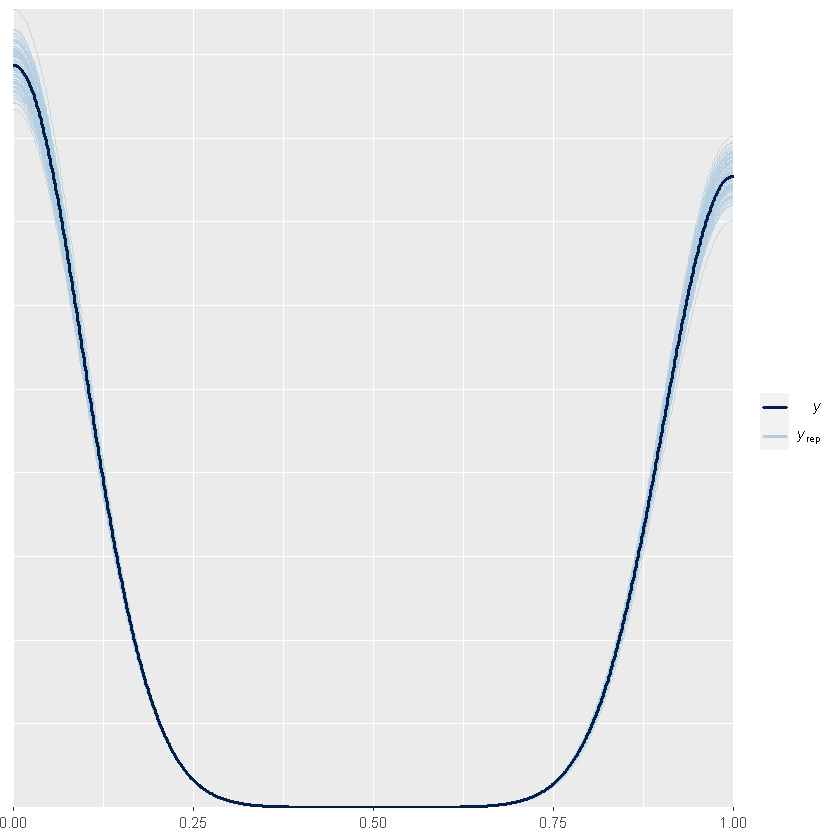

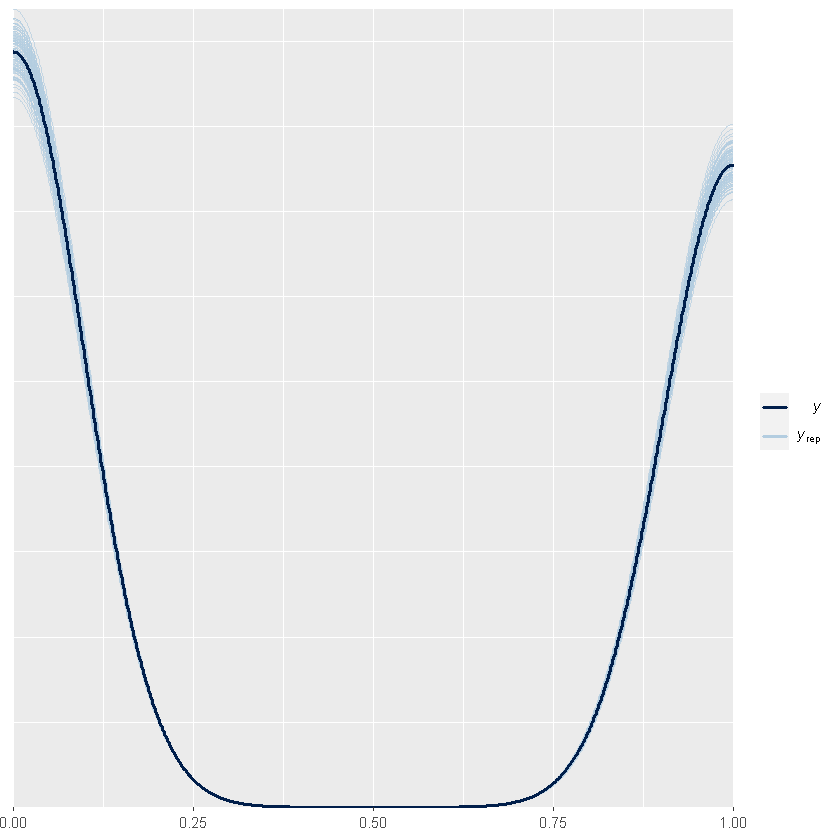

In [46]:
pp_check(model_hierarchical, nsamples = 100)

pp_check(model_non_hierarchical_with, nsamples = 100)